# Pandas

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np

## Creating Dataframes

Dataframes are easiest think of as a dictionary of numpy arrays on steroids.  The 'arrays' are made up of homogenous data types but can each be a different data type themselves.  These arrays make up the columns, are referenced with a string label, and are called `Series`.  Each `Dataframe` is made up of 1 or more Series.  One of these `Series` are used as a row index and by default is set to 0..n-1 so as to behave similarly to array indexing.

In [4]:
df = pd.DataFrame({"name":  ["John", "Grace", "Turing", "Katie", "Ada"],
                   "age":   [25, np.nan, 36, 34, 31],
                   "gpa":   [2.5, 2.9, 3.3, np.nan, 3.9],
                   "class": [101, 201, np.nan, 201, 301],
                   "gender":["m", "f", "m", "f", "f"]})
df

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
1,Grace,NaN,2.9,201.0,f
2,Turing,36.0,3.3,NaN,m
3,Katie,34.0,NaN,201.0,f
4,Ada,31.0,3.9,301.0,f


We can also read from csv files.  The `pd.read_csv` function is nearly infinitely configurable and I suggest you review the documentation for it by evaluating `pd.read_csv`.  `index_col=0` tells it to use the first column as the index.

In [6]:
data = pd.read_csv("data.csv", index_col=0) #use first column as index
data.head()

,ct,secs,cl
id,,,
1000025,5,2,2
1002945,5,7,2
1015425,3,2,2
1016277,6,3,2
1017023,4,2,2


## Accessing dataframes and series

In [5]:
df["name"]

0      John
1     Grace
2    Turing
3     Katie
4       Ada
Name: name, dtype: object

In [6]:
df["name"][:2]

0     John
1    Grace
Name: name, dtype: object

In [7]:
df.iloc[:2]  # select a whole row by array location using .iloc

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
1,Grace,NaN,2.9,201.0,f


In [8]:
tmp_df = df.copy()            # we make a copy here since I want to keep the original
tmp_df.index = tmp_df["name"] # set the index to names instead of monotonic ids
tmp_df                        # print out the result

,name,age,gpa,class,gender
name,,,,,
John,John,25.0,2.5,101.0,m
Grace,Grace,NaN,2.9,201.0,f
Turing,Turing,36.0,3.3,NaN,m
Katie,Katie,34.0,NaN,201.0,f
Ada,Ada,31.0,3.9,301.0,f


We now have an index with the same values as the name column, let's get rid of the extra column.  We use axis=1 to signify we want to drop a column but to drop a row we'd pass axis=0 and identify it by the index name

In [9]:
tmp_df.drop("name", axis=1) 

,age,gpa,class,gender
name,,,,
John,25.0,2.5,101.0,m
Grace,NaN,2.9,201.0,f
Turing,36.0,3.3,NaN,m
Katie,34.0,NaN,201.0,f
Ada,31.0,3.9,301.0,f


In [10]:
tmp_df  # Why does the name column show back up?  Most functions create a copy of the dataframe
        # to avoid this we could either overwrite tmp_df or use the inplace argument

,name,age,gpa,class,gender
name,,,,,
John,John,25.0,2.5,101.0,m
Grace,Grace,NaN,2.9,201.0,f
Turing,Turing,36.0,3.3,NaN,m
Katie,Katie,34.0,NaN,201.0,f
Ada,Ada,31.0,3.9,301.0,f


In [11]:
tmp_df.drop("name", axis=1, inplace=True)
tmp_df

,age,gpa,class,gender
name,,,,
John,25.0,2.5,101.0,m
Grace,NaN,2.9,201.0,f
Turing,36.0,3.3,NaN,m
Katie,34.0,NaN,201.0,f
Ada,31.0,3.9,301.0,f


Now that the index is made up of something other than 0..n-1 integers we can also use .loc to select a row by index name

In [12]:
tmp_df.loc["Grace"]

age       NaN
gpa       2.9
class     201
gender      f
Name: Grace, dtype: object

In [13]:
tmp_df.loc["Grace":"Turing"]  #slices work but in .loc they include the endpoint of the slice

,age,gpa,class,gender
name,,,,
Grace,NaN,2.9,201.0,f
Turing,36.0,3.3,NaN,m


## Data Analysis
The first thing to do is to get an idea of what the data looks like.  For this we gather statistical features, many of which we can pick up using `.describe()`.  This will return the mean, standard deviation, min, max and the quartiles.

In [14]:
df.describe()

,age,gpa,class
count,4.000000,4.000000,4.000000
mean,31.500000,3.150000,201.000000
std,4.795832,0.597216,81.649658
min,25.000000,2.500000,101.000000
25%,29.500000,2.800000,176.000000
50%,32.500000,3.100000,201.000000
75%,34.500000,3.450000,226.000000
max,36.000000,3.900000,301.000000


We can also ask pandas to describe a particular column and if it is of a certain type it will tell us how many unique values and the most common value.

In [15]:
df["name"].describe()

count         5
unique        5
top       Grace
freq          1
Name: name, dtype: object

In [16]:
df["name"].unique()

array(['John', 'Grace', 'Turing', 'Katie', 'Ada'], dtype=object)

Going back to the csv data we can show some interesting things:

In [17]:
data["cl"].unique()   # cl column has two unique values

array([2, 4])

In [18]:
data["cl"].value_counts()  # 2 is twice as prevalent as 4...

2    413
4    232
Name: cl, dtype: int64

In [19]:
df.mean()  # many of the obvious stats functions will work here mean, std, max, min, etc

age       31.50
gpa        3.15
class    201.00
dtype: float64

## Data cleanup and basic imputation

### Cleanup

If you noticed in the sample data I created for `df` there are some values marked `NaN` or not a number this is a common way to mark missing data and pandas can do a variety if different things for us regarding cleaning up or imputing data.  `.dropna()` will drop rows that contain at least one columnn with missing data.

In [20]:
df.dropna()

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
4,Ada,31.0,3.9,301.0,f


In [21]:
df.dropna(axis=1)  # we can also drop rows who have missing columns. Notice  axis = 1

,name,gender
0,John,m
1,Grace,f
2,Turing,m
3,Katie,f
4,Ada,f


### Imputation
Now lets say that instead of throwing out data we want to make some educated guesses using the data we do have.  A simple thing might be to assign Jane's ages as the mean of the other student's ages.  This is easily done with the `.mean()` and `.fillna()` functions.  Take note that `mean` by default calculates the mean by ignoring the `NaN` values.

In [38]:
mean_age = int(df["age"].mean())    # the int just forces the mean to round down to an int
mean_age

31

In [40]:
df["age"].fillna(mean_age, inplace=True)
df

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
1,Grace,31.0,2.9,201.0,f
2,Turing,36.0,3.3,NaN,m
3,Katie,34.0,NaN,201.0,f
4,Ada,31.0,3.9,301.0,f


It might also be reasonable to assign the Frank to the class that most other people are taking...

In [44]:
biggest_class = df["class"].mode()  # From the docs: "The mode of a set of values is the value that appears most 
biggest_class                       # often.  It can be multiple values."  Hence it returns a series

0    201.0
dtype: float64

In [56]:
df["class"].fillna(biggest_class[0], inplace=True)  # we have to use the [0] here to turn it into a scalar
df

,name,age,gpa,class,gender,model_gpa
0,John,25.0,2.5,101.0,m,2.5
1,Grace,31.0,2.9,201.0,f,3.1
2,Turing,36.0,3.3,201.0,m,3.6
3,Katie,34.0,3.4,201.0,f,3.4
4,Ada,31.0,3.9,301.0,f,3.1


Finally we'll do something a little more advanced.  We'll build a simple model (contained in the function below).   In the future when we get to scikit-learn and other packages you can build imputation models that are a bit more valid and complicated.  For now we'll just say that for any missing values their gpa is equal to their age / 10 maxed out at 4.0 and minned out at 1.0.

In [46]:
def model(age):
    gpa = age / 10
    gpa = max(1.0, gpa)
    return min(4.0, gpa)

In [47]:
model(41), model(25), model(5)  # check that our bounds work

(4.0, 2.5, 1.0)

In [53]:
modeled_gpas = df["age"].apply(model)

In [55]:
# if you pass a Series to fillna it will only overwrite the values that are NaN
df["gpa"].fillna(modeled_gpas, inplace=True)
df

,name,age,gpa,class,gender,model_gpa
0,John,25.0,2.5,101.0,m,2.5
1,Grace,31.0,2.9,201.0,f,3.1
2,Turing,36.0,3.3,NaN,m,3.6
3,Katie,34.0,3.4,201.0,f,3.4
4,Ada,31.0,3.9,301.0,f,3.1


In [48]:
# here we're going to create a new column, that contains our modeled gpa values:
df["model_gpa"] = modeled_gpas
df

,name,age,gpa,class,gender,model_gpa
0,John,25.0,2.5,101.0,m,2.5
1,Grace,31.0,2.9,201.0,f,3.1
2,Turing,36.0,3.3,NaN,m,3.6
3,Katie,34.0,NaN,201.0,f,3.4
4,Ada,31.0,3.9,301.0,f,3.1


And now we have a complete dataset!

## Plotting

Pandas makes good use of matplotlib and allows us to do plots without getting into the lower-level matplotlib

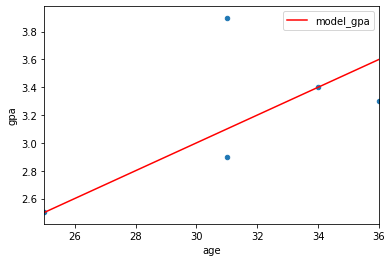

In [31]:
# we can plot age v. gpa to see how good or bad our model is
#  we sort by the age first so the line plot looks right
ax = df.sort_values("age").plot("age", "gpa", kind="scatter")
# here we hijack the the returned axes object to plot our model
ax = df.sort_values("age").plot("age", "model_gpa", ax=ax, c="r")  # c="r" means plot red

Now we'll go back to our iris dataset.  I'll show you how to import it into pandas and to make use of some of the plotting functions from there.

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

A short digression into basic python:  the `enumerate` iterator takes another iterator and creates a tuple with an index counter.  Like so:

In [5]:
list(enumerate(iris.feature_names))

[(0, 'sepal length (cm)'),
 (1, 'sepal width (cm)'),
 (2, 'petal length (cm)'),
 (3, 'petal width (cm)')]

In [6]:
tmp = {}
for i, name in enumerate(iris.feature_names):  # now each loop returns a tuple we can unpack into an index and a name
    tmp[name] = iris.data[:, i]
print(tmp)

targets = []
for t in iris.target:
    targets += [iris.target_names[t]]  # this works the same as append
print(targets)
    
tmp["target"] = targets
iris_df = pd.DataFrame(tmp)
iris_df.head()

{'sepal length (cm)': array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]), 'sepal width (cm)': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


A not so basic set of techniques are list/dictionary/set/etc comprehensions.  The best way to think of them is using a for loop to define a list or dictionary directly.  I am showing this because they can be powerful.  But they can also make your code hard to read you overuse them.

In [37]:
tmp = {name: iris.data[:, i] for i, name in enumerate(iris.feature_names)}  # dictionar comprehension
tmp["target"] = [iris.target_names[i] for i in iris.target]
iris_df = pd.DataFrame(tmp)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


I don't want to have to type the full feature name so I'll just redefine them below

In [38]:
iris_df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]

In [39]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
iris_df["target"].describe()

count        150
unique         3
top       setosa
freq          50
Name: target, dtype: object

And now back to plotting two and only two columns, pandas automatically assigns them separate colors

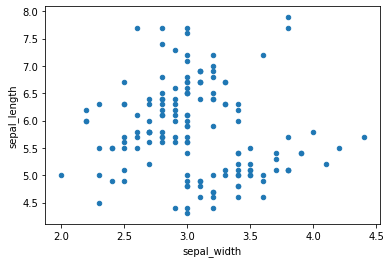

In [41]:
iris_df.plot(x="sepal_width", y="sepal_length", kind="scatter")

But this doesn't tell us much about the way each variable interacts with each other

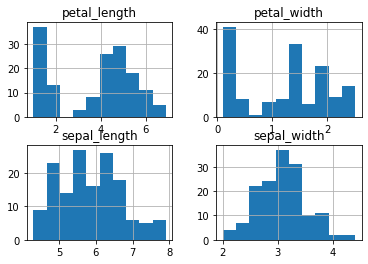

In [42]:
iris_df.hist();

We can show another useful plot the scatter_matrix, this helps us determine correlations between variables (off-diagonals) and the distribution of of each variable (diagonal axis)

In [43]:
from pandas.plotting import scatter_matrix

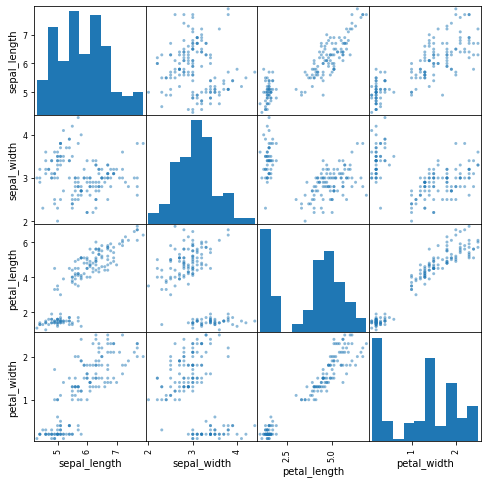

In [44]:
scatter_matrix(iris_df, figsize=(8,8));